**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

**Importing data & Analysis**

In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


/tmp/ipython-input-4179901685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='DEATH_EVENT', data=df, palette=cols)


[Text(0, 0, '203')]

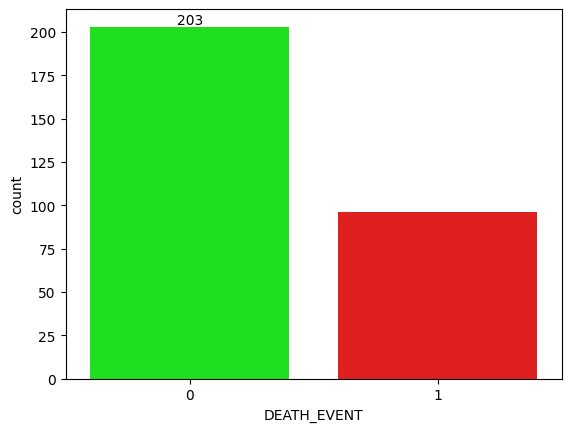

In [ ]:
cols = ["#00FF00","#FF0000"]
ax = sns.countplot(x='DEATH_EVENT', data=df, palette=cols)
ax.bar_label(ax.containers[0])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

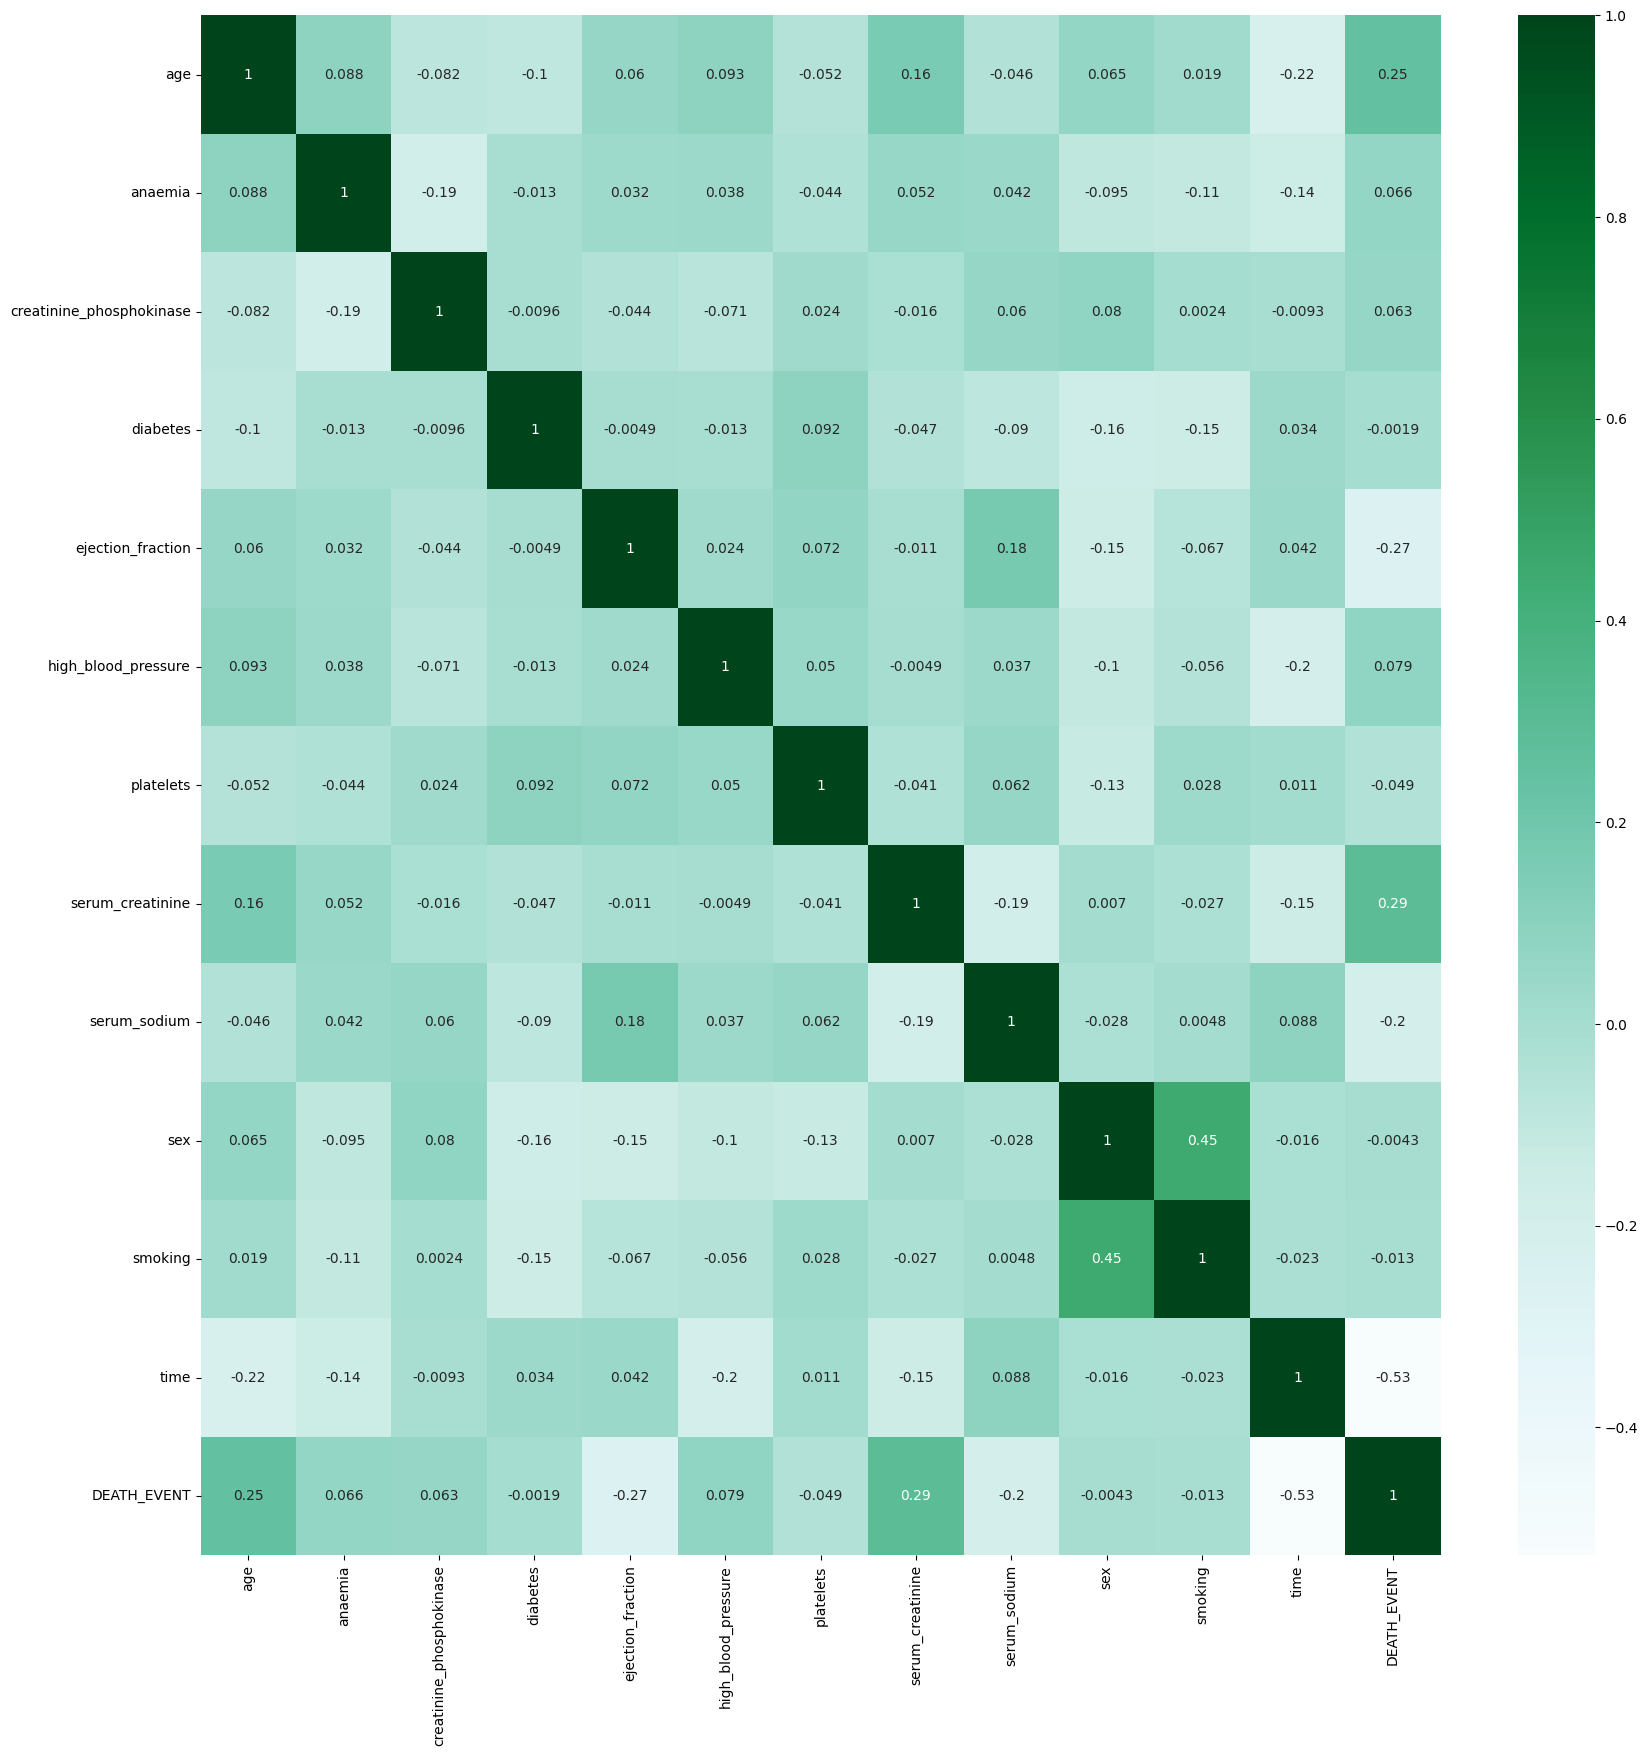

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap='BuGn',annot=True)

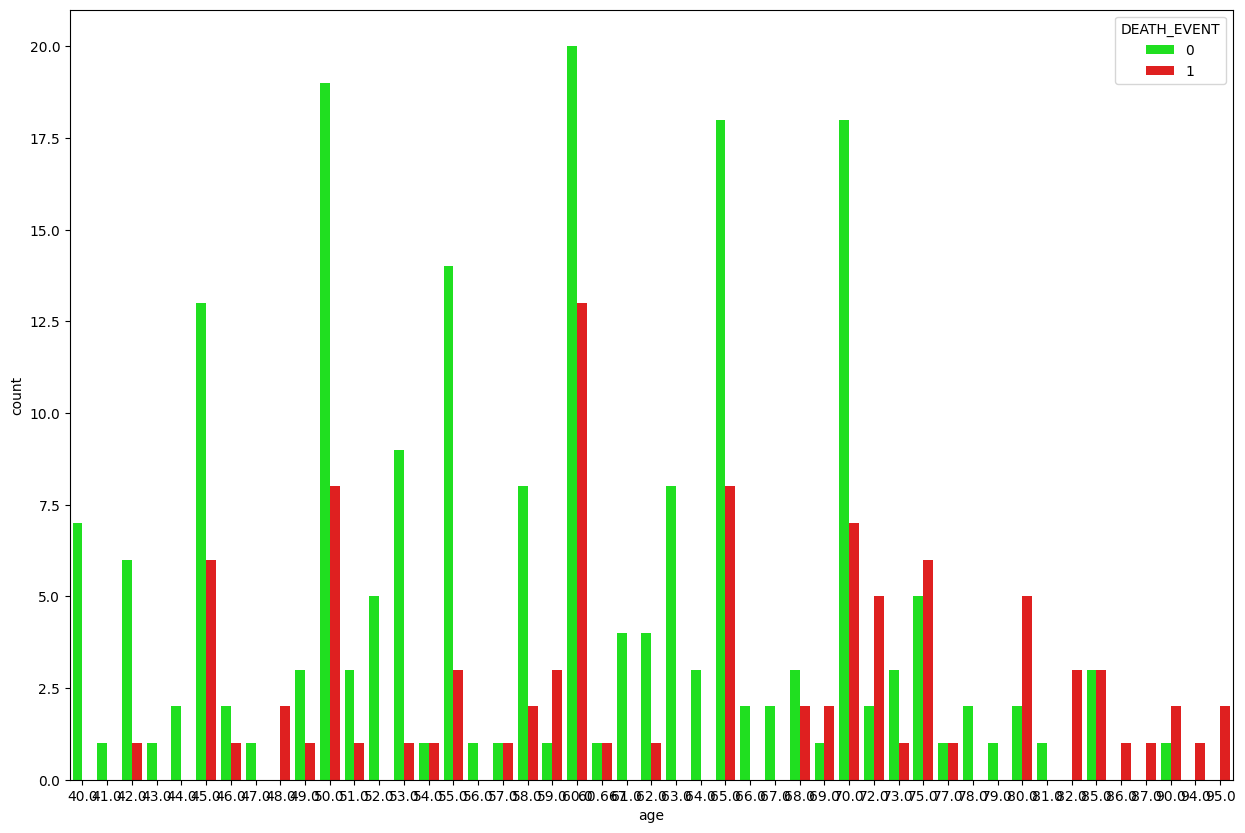

In [ ]:
plt.figure(figsize=(15,10))
days_of_week = sns.countplot(x=df['age'], data=df, hue="DEATH_EVENT", palette=cols)

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)


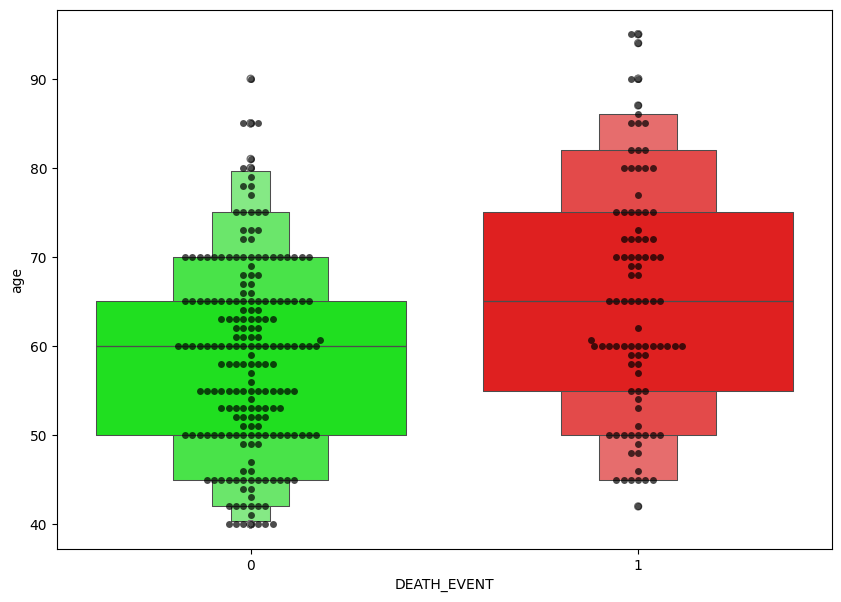

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


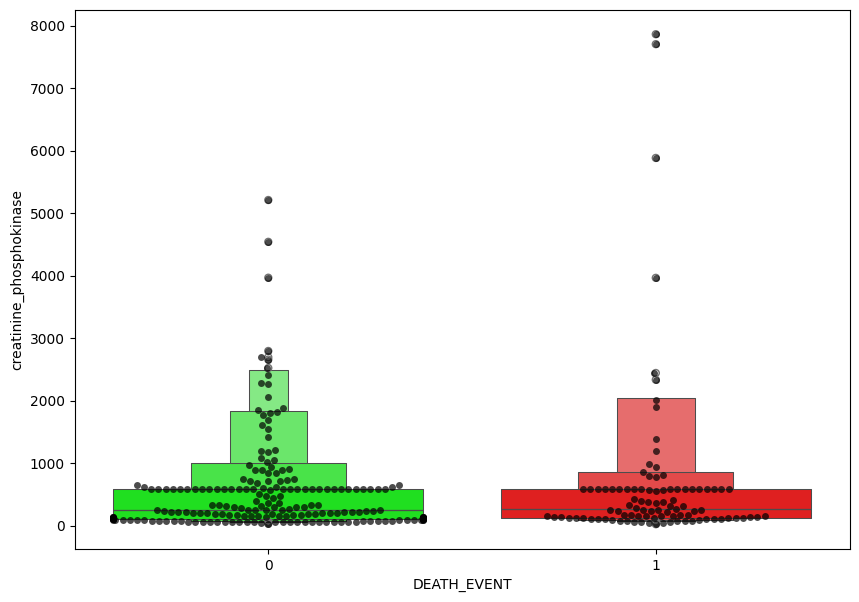

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)


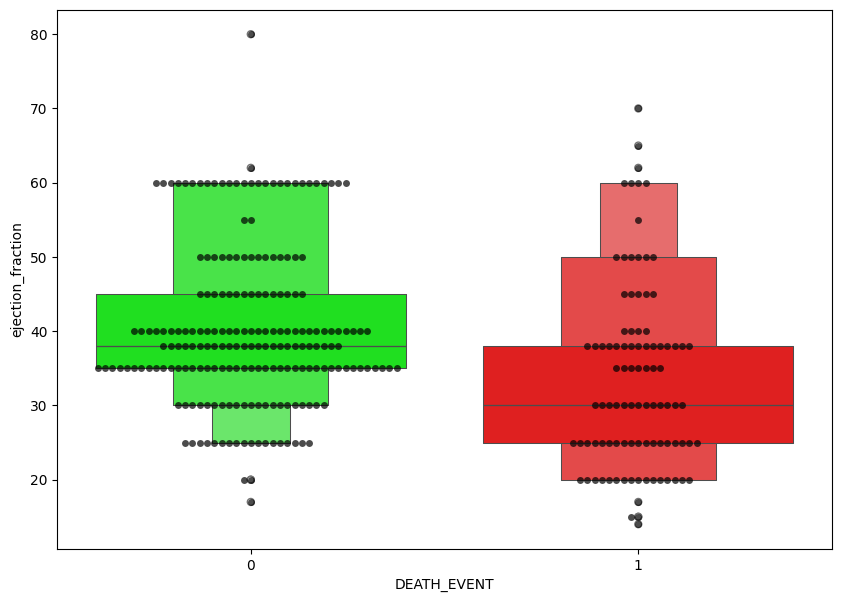

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)


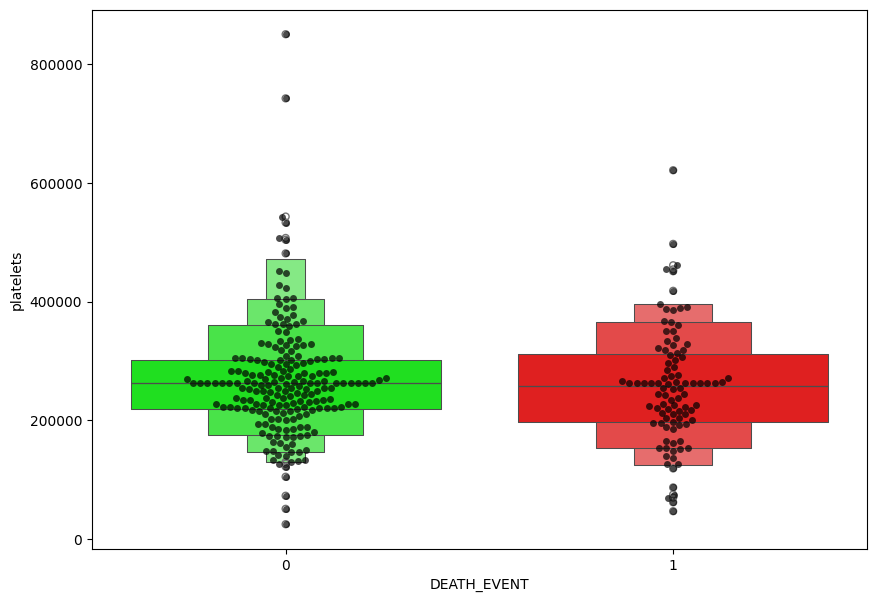

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


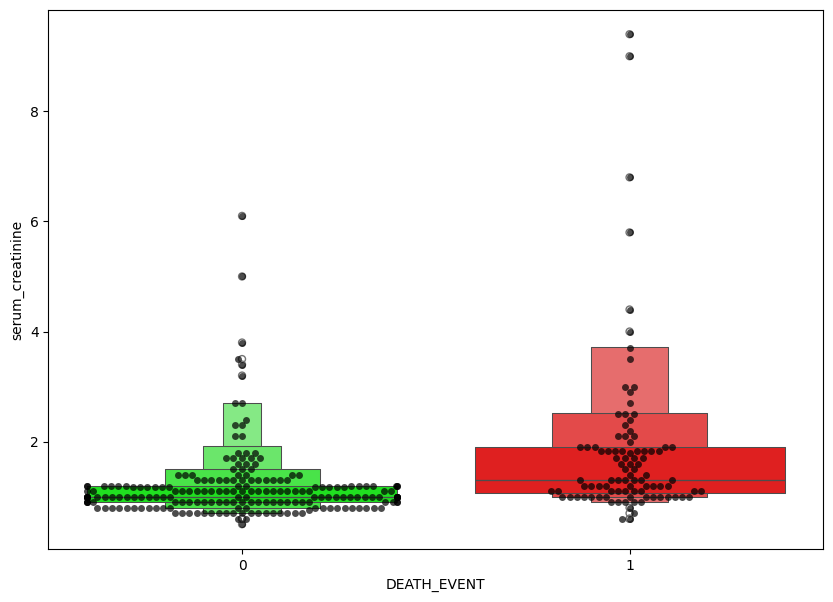

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)


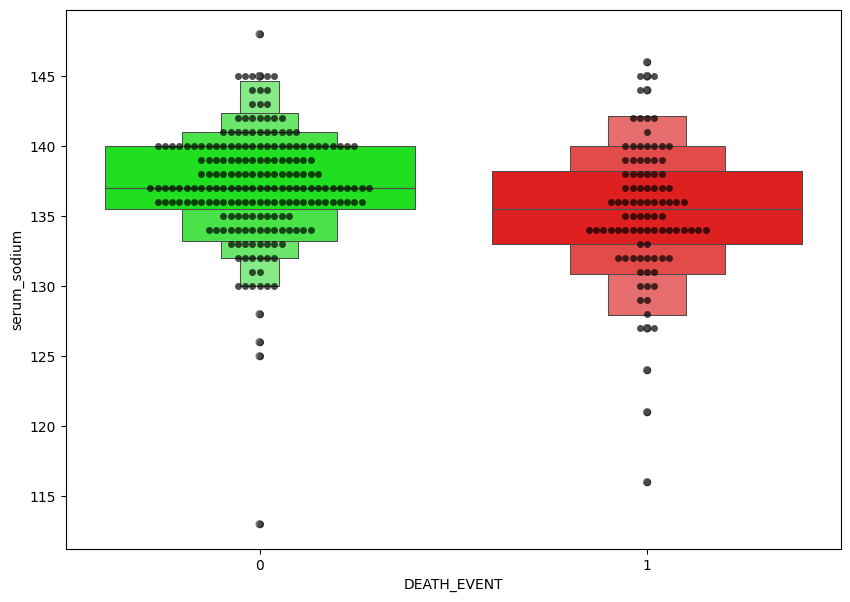

/tmp/ipython-input-1164443461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)


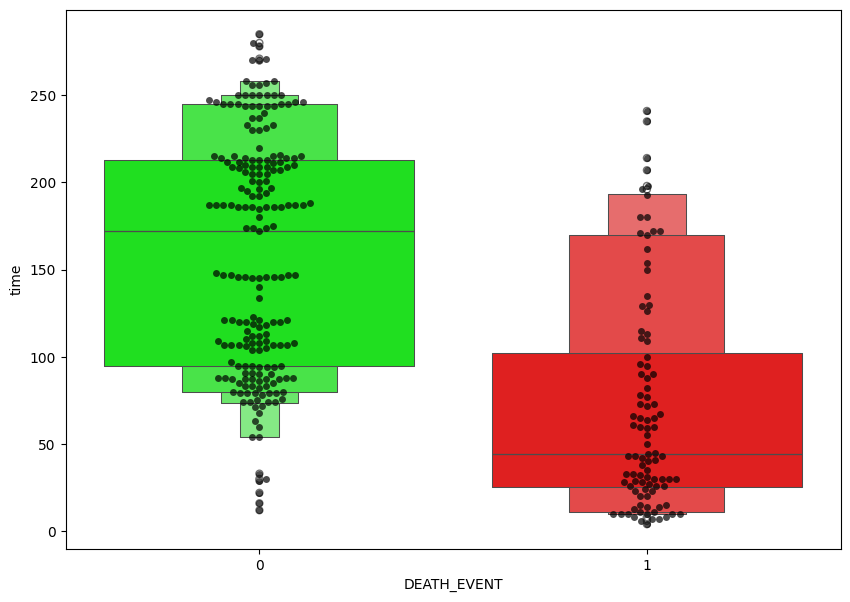

In [ ]:
featurs = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium",
           "time"]

for i in featurs:
  plt.figure(figsize=(10,7))
  sns.swarmplot(x=df['DEATH_EVENT'],y=df[i],color="black", alpha=0.7)
  sns.boxenplot(x=df['DEATH_EVENT'],y=df[i],palette=cols)
  plt.show()


**Data Preprocessing**

In [ ]:
x = df.drop(["DEATH_EVENT"],axis=1)
y = df["DEATH_EVENT"]

In [ ]:
col_name = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled = s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=col_name)

In [ ]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<function matplotlib.pyplot.show(close=None, block=None)>

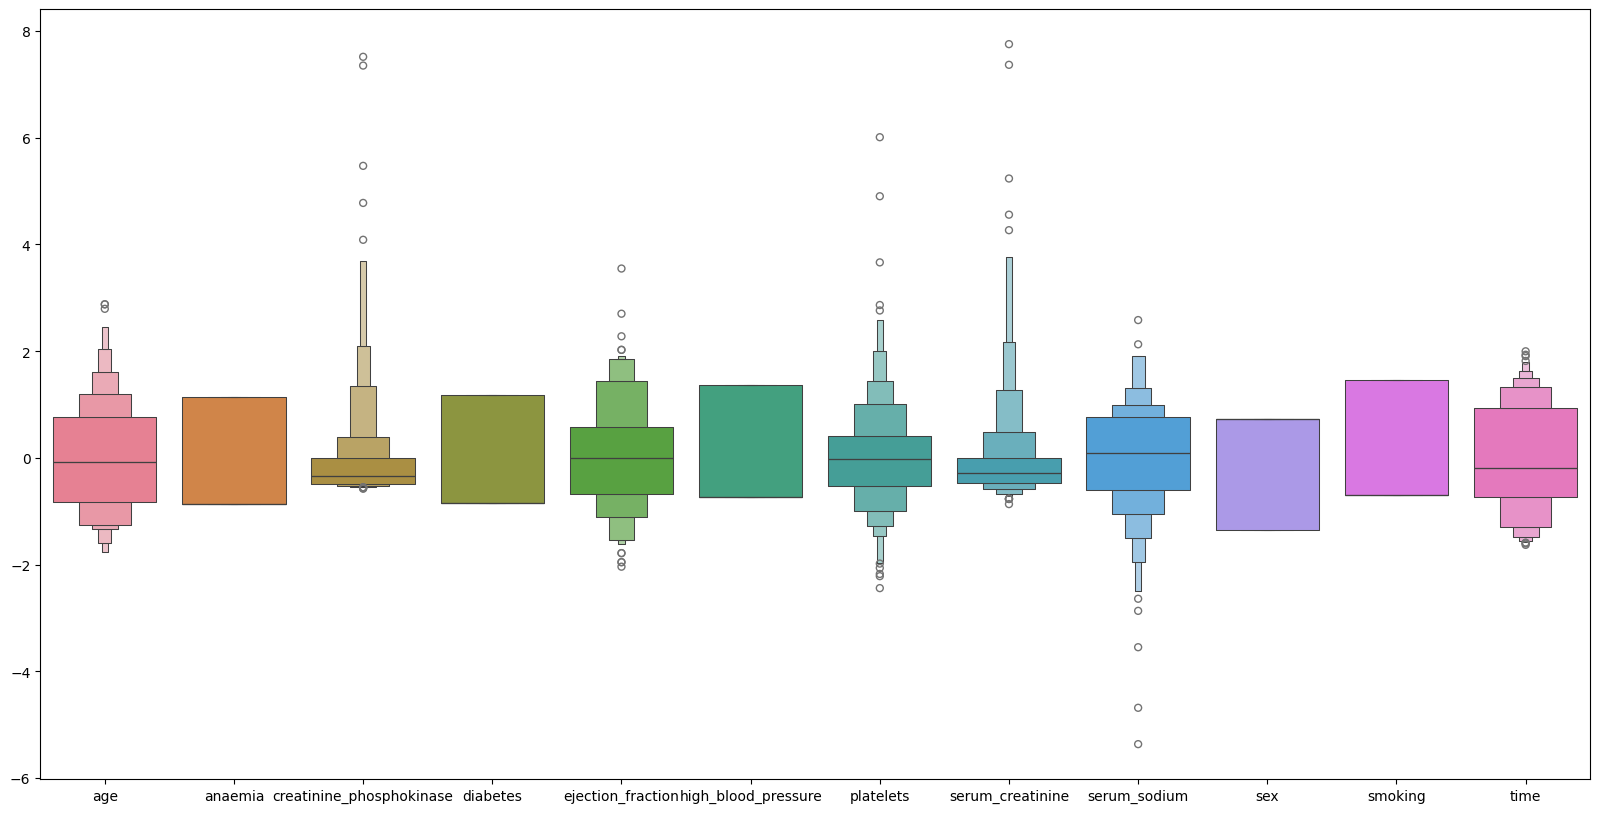

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = x_scaled)
plt.show

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

**Model Building**

**SVM**

In [ ]:
model1 = svm.SVC()
svm_model = model1.fit(x_train,y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1])

In [ ]:
y_test

,DEATH_EVENT
60,1
280,0
172,0
265,0
297,0
...,...
149,0
281,0
36,1
175,0


In [ ]:
y_train

,DEATH_EVENT
87,0
237,0
232,0
11,1
241,0
...,...
269,0
74,1
130,0
226,0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        56
           1       0.83      0.56      0.67        34

    accuracy                           0.79        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.79      0.79      0.78        90



# **ANN**

In [ ]:
early_stopping = callbacks.EarlyStopping(
  min_delta = 0.001, patience = 20, restore_best_weights = True)
model1 = Sequential()
model1.add (Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model1. add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))

model1. add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))

model1.add(Dense(units = 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model1.fit(x_train, y_train, batch_size = 25, epochs=100, callbacks =[early_stopping], validation_split= 0.25 )

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.6547 - loss: 0.6927 - val_accuracy: 0.6038 - val_loss: 0.6923
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7280 - loss: 0.6909 - val_accuracy: 0.6038 - val_loss: 0.6915
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7569 - loss: 0.6886 - val_accuracy: 0.6038 - val_loss: 0.6905
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6947 - loss: 0.6878 - val_accuracy: 0.6038 - val_loss: 0.6895
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8049 - loss: 0.6824 - val_accuracy: 0.6038 - val_loss: 0.6881
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7406 - loss: 0.6813 - val_accuracy: 0.6038 - val_loss: 0.6865
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7385 - loss: 0.6785 - val_accuracy: 0.6038 - val_loss: 0.6842
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7461 - loss: 0.6732 - val_accuracy: 0.6038 - val_loss

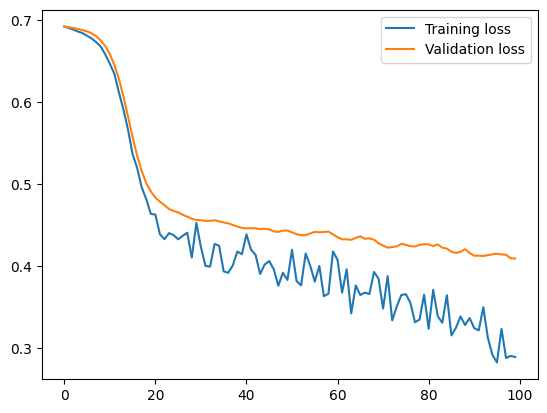

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], label = "Training loss")
plt.plot(history_df.loc[:, ['val_loss']], label = "Validation loss")
plt.legend()
plt.show()

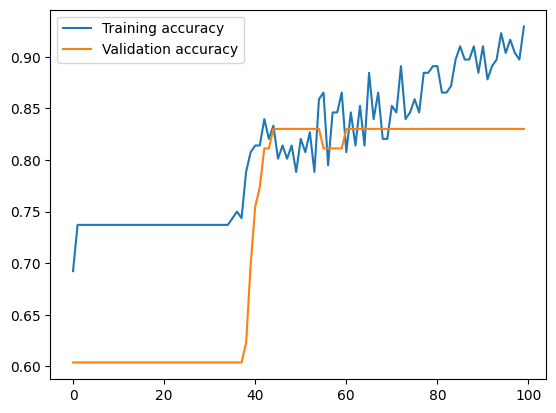

In [ ]:
plt.plot(history_df.loc[:, ['accuracy']], label = "Training accuracy")
plt.plot(history_df.loc[:, ['val_accuracy']], label = "Validation accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred = model1.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        56
           1       0.81      0.65      0.72        34

    accuracy                           0.81        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90

